# Canada House Price Prediction

**Final Project - AASD 4010 Deep Learning - I**
**Professor: Moe Fadaee**

**Group 2**
- Ahmed, Qusay
- Gonçalves, Ednaldo
- Khan, Sami 
- Osta, Mustafa
- Jack Chang

## Libraries

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Exploratory Data Analysis

**Features Columns**
- City: City or major metropolitan area within which listings were found. For example, Toronto may include listings from surrounding -suburbs such as Markham, Oakville, etc.
- Price: Listed price for the property in Canadian dollars.
- Address: Street address and, where applicable, unit number for the listing.
- Number_Beds: Number of bedrooms mentioned in the listing.
- Number_Baths: Number of bathrooms mentioned in the listing.
- Province: Province in which each city resides. Note, border towns such as Ottawa do not include listings from the surrounding out-of--   province cities like Gatineau.
- Population: City population. According to simplemaps (https://simplemaps.com/data/canada-cities)
- Longitude / Latitude: Longitude and Latitude data for individual cities, taken from simpelmaps (https://simplemaps.com/data/canada-cities)
- Median_Family_Income: Median household income for the city taken from the 2021 Canadian census.

Data used: https://www.kaggle.com/datasets/jeremylarcher/canadian-house-prices-for-top-cities/data?select=HouseListings-Top45Cities-10292023-kaggle.csv

In [2]:
# read the csv file
#data = pd.read_csv("data/Canada_House_Price_New.csv")
#data = pd.read_csv("data/18100205.csv")
#data = pd.read_csv("data/housing-supply-price-rental.csv")
data = pd.read_csv("data/HouseListings-Top45Cities-10292023-kaggle.csv",encoding="latin1")
#data = pd.read_csv("data/Housing.csv",encoding="latin1")
print(data.shape)

(35768, 10)


First 5 records of our dataset

In [3]:
data.head(5).T

,0,1,2,3,4
City,Toronto,Toronto,Toronto,Toronto,Toronto
Price,779900.0,799999.0,799900.0,1200000.0,668800.0
Address,#318 -20 SOUTHPORT ST,#818 -60 SOUTHPORT ST,#714 -859 THE QUEENSWAY,275 MORTIMER AVE,#420 -388 RICHMOND ST
Number_Beds,3,3,2,4,1
Number_Baths,2,1,2,2,1
Province,Ontario,Ontario,Ontario,Ontario,Ontario
Population,5647656,5647656,5647656,5647656,5647656
Latitude,43.7417,43.7417,43.7417,43.7417,43.7417
Longitude,-79.3733,-79.3733,-79.3733,-79.3733,-79.3733
Median_Family_Income,97000.0,97000.0,97000.0,97000.0,97000.0


In [7]:
#get some information about our DataSet
data.info()
data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


,count,mean,std,min,25%,50%,75%,max
Price,35768.0,943296.251812,1.020110e+06,21500.0000,459900.0000,699000.0000,1.095000e+06,3.700000e+07
Number_Beds,35768.0,3.283661,1.730654e+00,0.0000,2.0000,3.0000,4.000000e+00,1.090000e+02
Number_Baths,35768.0,2.532403,1.371910e+00,0.0000,2.0000,2.0000,3.000000e+00,5.900000e+01
Population,35768.0,636015.093268,1.120016e+06,63382.0000,109167.0000,242460.0000,5.228880e+05,5.647656e+06
Latitude,35768.0,47.446556,3.333855e+00,42.2833,43.8667,49.0250,4.988810e+01,5.391690e+01
Longitude,35768.0,-98.421636,2.228094e+01,-123.9364,-122.3167,-104.6067,-7.986670e+01,6.310050e+01
Median_Family_Income,35768.0,89643.103416,1.213235e+04,62400.0000,82000.0000,89000.0000,9.700000e+04,1.330000e+05


In [8]:
# check if there are any Null values
data.isnull().sum()

City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

In [9]:
# Remove columns with all values equal to 0
data = data.loc[:, (data != 0).any(axis=0)]

### Convert a list of longitude/latitude to Canadian postal codes

#### Install the geopy library

In [26]:
pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 2.2 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


#### Script to convert longitude/latitude coordinates to Canadian postal codes

In [ ]:
from geopy.geocoders import GoogleV3

def coordinates_to_postal_code(api_key, latitude, longitude):
    geolocator = GoogleV3(api_key=api_key)

    location = geolocator.reverse((latitude, longitude), language='en')
    
    # Extract postal code from the returned address
    postal_code = None
    for component in location.raw['address_components']:
        if 'postal_code' in component['types']:
            postal_code = component['long_name']
            break
    
    return postal_code

def main():
    # Replace 'YOUR_GOOGLE_MAPS_API_KEY' with your actual API key
    api_key = 'YOUR_GOOGLE_MAPS_API_KEY'

    # Example coordinates (replace with your own list of coordinates)
    coordinates_list = [
        (45.4215, -75.6993),  # Example coordinate in Ottawa, ON
        (43.6532, -79.3832)   # Example coordinate in Toronto, ON
        # Add more coordinates as needed
    ]

    for lat, lon in coordinates_list:
        postal_code = coordinates_to_postal_code(api_key, lat, lon)
        print(f"Latitude: {lat}, Longitude: {lon} => Postal Code: {postal_code}")

if __name__ == "__main__":
    main()

/var/folders/bm/mbwgf9yx4x18r_3xghcr94d80000gn/T/ipykernel_9302/1992615286.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])
/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


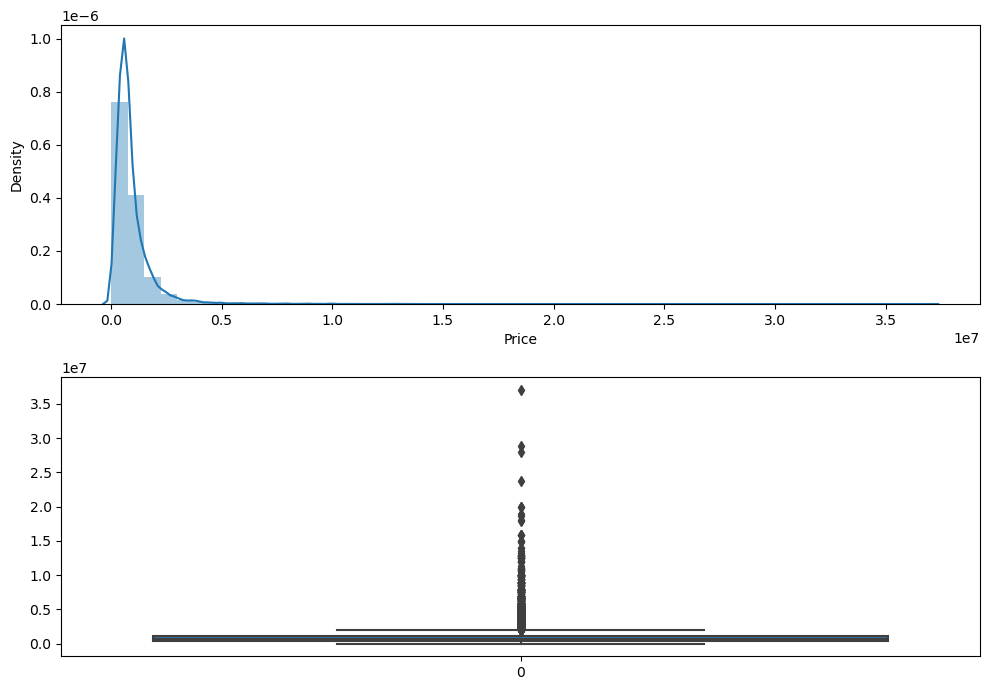

In [10]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(data['Price'])
fig.add_subplot(2,1,2)
sns.boxplot(data['Price'])
plt.tight_layout()

#### One Hot Encoding of the Categorical Features

Distribution of features between numeric and categorical.

/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


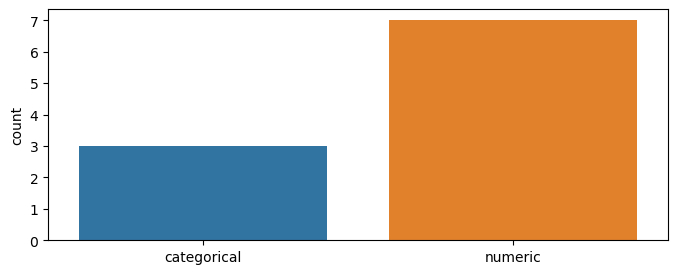

In [11]:
column_data_type = []
for col in data.columns:
    data_type = data[col].dtype
    if data[col].dtype in ['int64','float64']:
        column_data_type.append('numeric')
    else:
        column_data_type.append('categorical')
plt.figure(figsize=(8,3))
sns.countplot(x=column_data_type)
plt.show()

Here as we see that the number of categorical features actually exceeds the number of numeric features which shows how important these features are. Here we have chosen One hot encoding to convert these categorical features into numerical.

In [12]:
#data = pd.get_dummies(data)

In [13]:
#data.head(5).T

In [14]:
# Converting 'True' to 1 and 'False' to 0 in all columns
#data = data.applymap(lambda x: 1 if x == 'True' else (0 if x == 'False' else x))

In [15]:
# Remove the last column
#data = data.iloc[:, :-1]

#### Extract the top-features from our training dataset that have the highest correlation with the Price

In [16]:
# check correlation
# let's drop unnecessory featurs for correlation

data = data.drop('City',axis=1)
data = data.drop('Address',axis=1)
data = data.drop('Province',axis=1)

data.corr()['Price'].sort_values(ascending=False)

Price                   1.000000
Number_Baths            0.466821
Number_Beds             0.329956
Population              0.074892
Median_Family_Income    0.059795
Latitude               -0.066704
Longitude              -0.138830
Name: Price, dtype: float64

<Axes: >

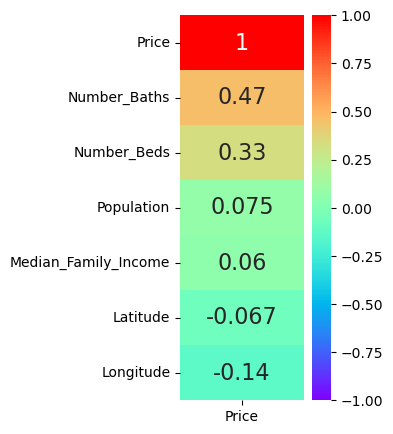

In [17]:
top_features = data.corr()[['Price']].sort_values(by=['Price'],ascending=False).head(30)
plt.figure(figsize=(2,5))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

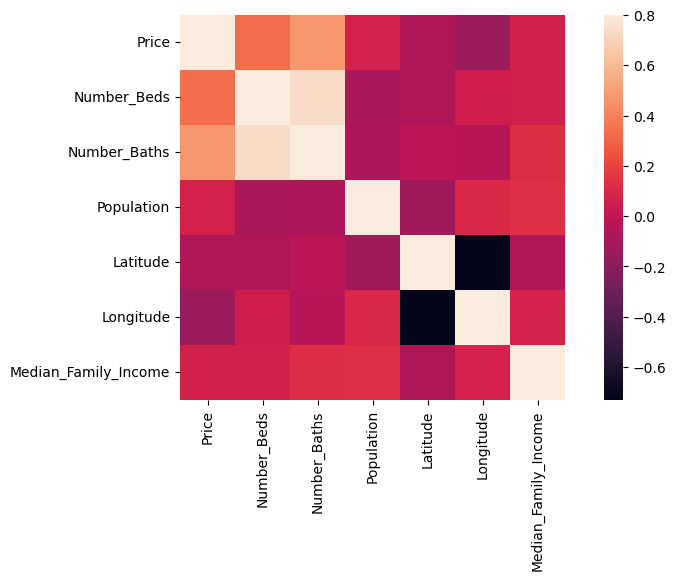

In [18]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corrmat, vmax=.8, square=True);

##### Plot top 5 most important for correlating with SalePrice

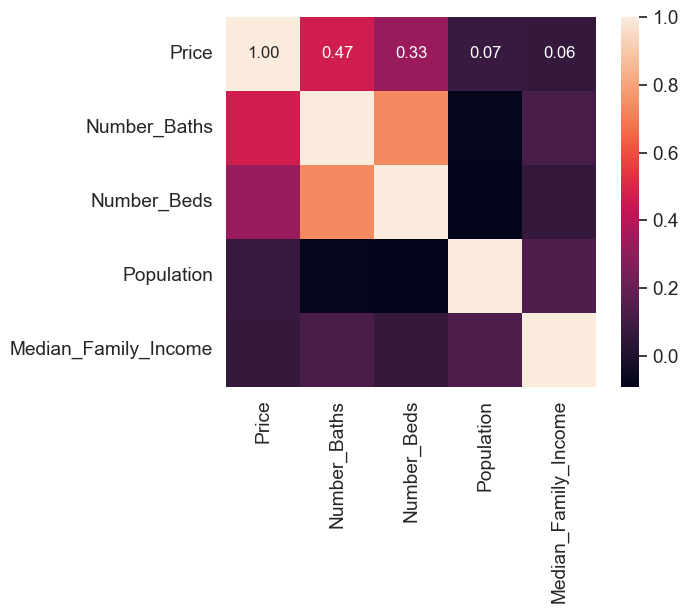

In [20]:
#saleprice correlation matrix
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Scatterplot these important features

/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

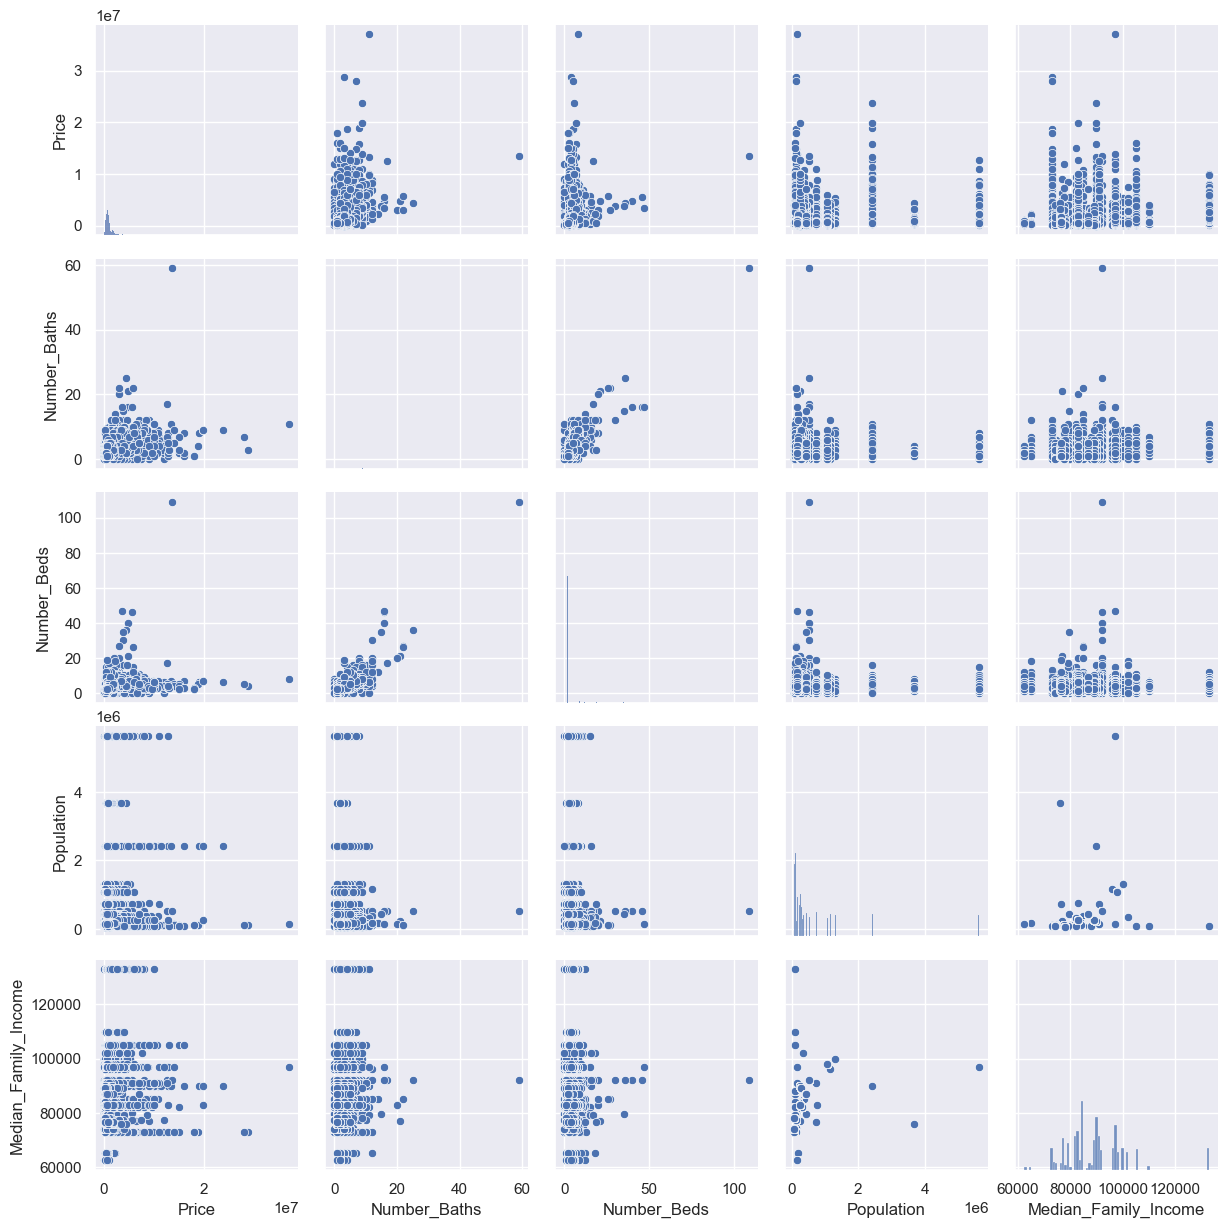

In [21]:
#scatterplot
sns.set()
cols = ['Price', 'Number_Baths', 'Number_Beds', 'Population', 'Median_Family_Income']
sns.pairplot(data[cols], height = 2.5)
plt.show();

<Axes: xlabel='Price', ylabel='Number_Baths'>

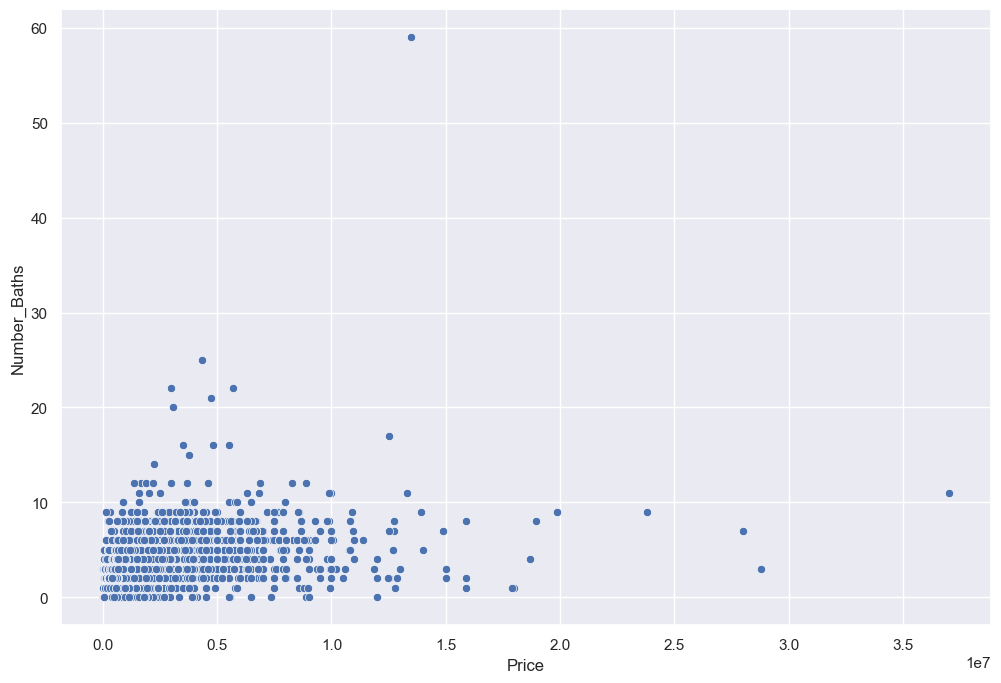

In [22]:
# feature with higher correlation
plt.figure(figsize=(12,8))
sns.scatterplot(x='Price',y='Number_Baths',data=data)

<Axes: xlabel='Number_Beds', ylabel='Price'>

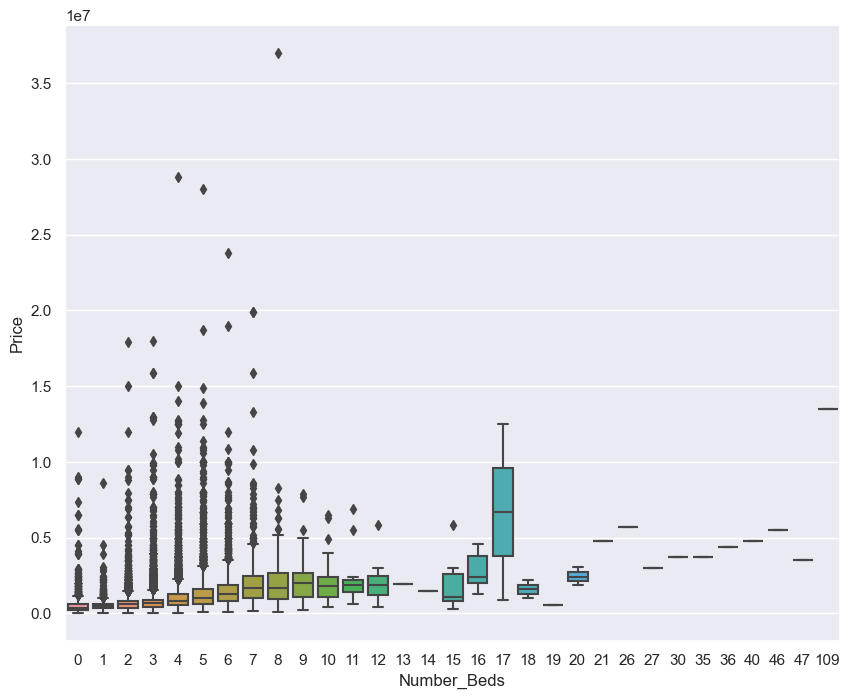

In [23]:
# feature like number of bedroom or bathroom
plt.figure(figsize = (10,8))
sns.boxplot(x = 'Number_Beds',y = 'Price', data = data)

# 2. Scaling and Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

#filling NA's with the mean of the column:
#data = data.fillna(data.mean())

X = data.drop('Price',axis =1).values
y = data['Price'].values

# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# 3. Feature Scalling

In [25]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train)
X_test = s_scaler.transform(X_test)

# 4. Methods

## Method 1: Multiple Linear Regression

In [26]:
#Liner Regression
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([    907.13581989,  464134.18551565,  110958.18747015,
       -308240.52472467, -364288.55867686,   -9273.88082302])

In [27]:
y_predd = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
df1 = df.head(10)
df1

,Actual,Predicted
0,645000.0,8.455308e+05
1,495000.0,9.685494e+05
2,349900.0,4.315157e+05
3,425900.0,5.483303e+05
4,249900.0,9.666762e+05
5,799900.0,1.167897e+06
6,695000.0,6.626099e+05
7,625000.0,1.181342e+06
8,1995000.0,1.394691e+06
9,599000.0,9.659307e+05


/var/folders/bm/mbwgf9yx4x18r_3xghcr94d80000gn/T/ipykernel_9302/3327774683.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)
/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

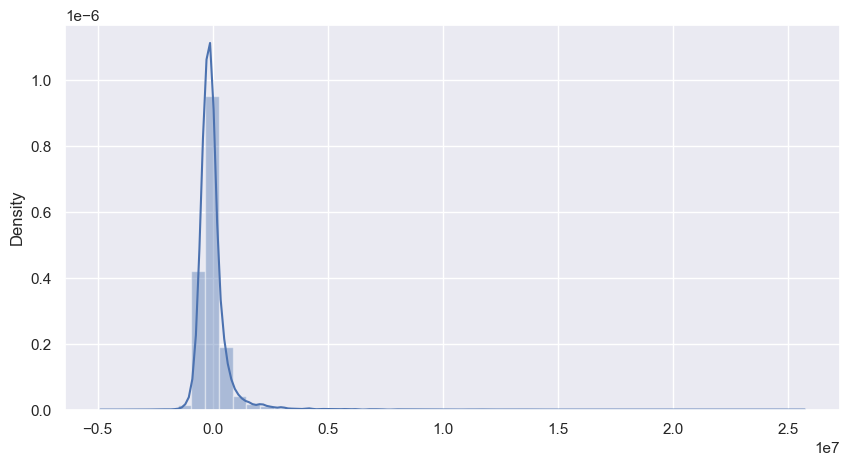

In [28]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_predd)
sns.distplot(residuals)

In [29]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)))

Mean Absolute Error: 402510.47
Mean Squared Error:636734874272.20
Root Mean Squared Error:797956.69
Variance score is: 0.32


In [31]:
# we are off about 20% (comparing mean absolut error and mean of price)
data['Price'].mean()

943296.2518116753

In [32]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test, y_test)))

Linear Regression Model:
Train Score 0.28
Test Score 0.32


## Method 2: Keras Regression

In [35]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam

In [36]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1))
    
    # Compile model
    model.compile(optimizer ='adam', loss = 'mse')
    return model

In [85]:
def create_model1():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mse')
    return model
model = create_model()

In [86]:
#model = create_model()
model = create_model1()
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 128)               896       
                                                                 
 dense_69 (Dense)            (None, 64)                8256      
                                                                 
 dense_70 (Dense)            (None, 32)                2080      
                                                                 
 dense_71 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
_________________________________________________________________


In [87]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=400, batch_size=128)

Epoch 1/400
224/224 [==============================] - 0s 836us/step - loss: 1223507181568.0000 - val_loss: 1044524302336.0000
Epoch 2/400
224/224 [==============================] - 0s 676us/step - loss: 1031720140800.0000 - val_loss: 1024581959680.0000
Epoch 3/400
224/224 [==============================] - 0s 672us/step - loss: 1029711659008.0000 - val_loss: 1018092257280.0000
Epoch 4/400
224/224 [==============================] - 0s 665us/step - loss: 1029749014528.0000 - val_loss: 1021684809728.0000
Epoch 5/400
224/224 [==============================] - 0s 664us/step - loss: 1028891344896.0000 - val_loss: 1018104643584.0000
Epoch 6/400
224/224 [==============================] - 0s 660us/step - loss: 1028295032832.0000 - val_loss: 1023269666816.0000
Epoch 7/400
224/224 [==============================] - 0s 662us/step - loss: 1027172663296.0000 - val_loss: 1023923060736.0000
Epoch 8/400
224/224 [==============================] - 0s 662us/step - loss: 1026040594432.0000 - val_loss: 101

<Axes: >

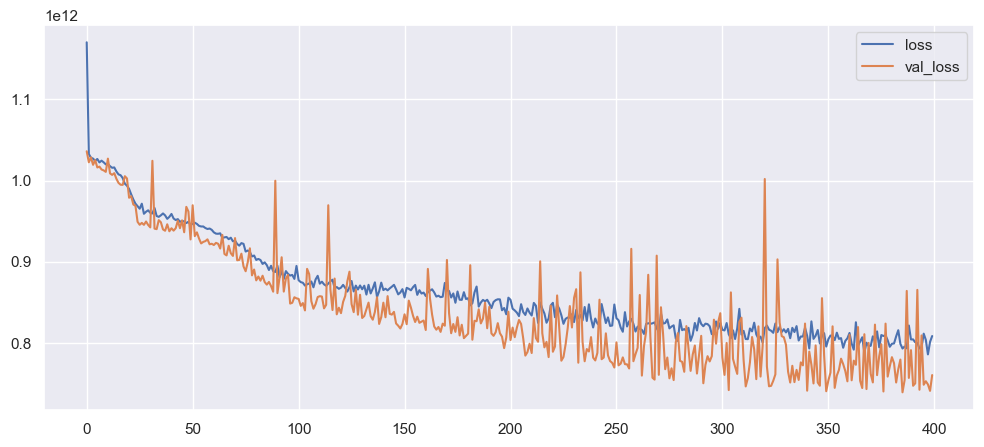

In [78]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,5))

## Evaluation on Test Data

In [79]:
y_pred = model.predict(X_test)

224/224 [==============================] - 0s 320us/step


In [80]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Mean Absolute Error: 462190.04
Mean Squared Error: 760097192530.91
Root Mean Squared Error: 871835.53
Variance score is: 0.28


In [81]:
# we are off about 20% (comparing mean absolut error and mean of price)
data['Price'].mean()

943296.2518116753

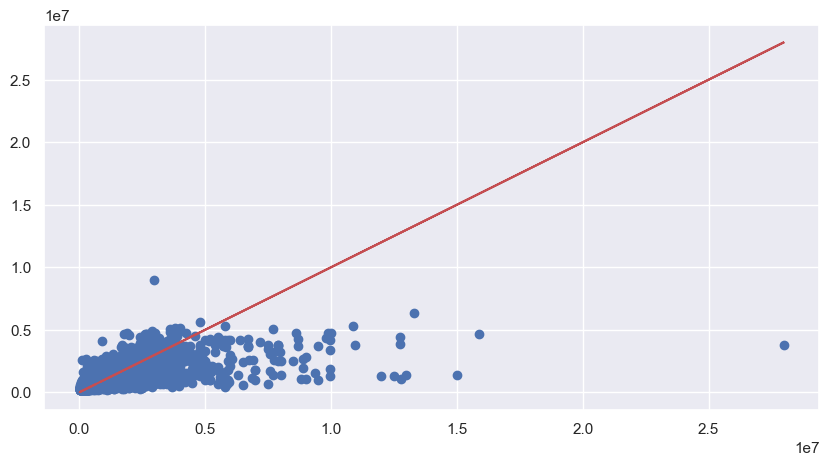

In [46]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

## How we can use the model?

In [47]:
# let's drop price and keep first line featurs, then put those featur inside the model and estimae the price!
single_house = data.drop('Price',axis = 1).iloc[0]

In [48]:
# need to apply featur scalling on those featurs
single_house = s_scaler.transform(single_house.values.reshape(-1,6))

In [49]:
# apply model on those featurs
model.predict(single_house)

1/1 [==============================] - 0s 13ms/step


array([[1109306.1]], dtype=float32)

In [51]:
# compare the prediction with real price for the first column
data['Price'][0]

779900.0

## Multiple Linear Regression vs Keras Regression

In [52]:
print('Model: Keras Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_test,y_pred)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)*100))

Model: Keras Regression

Mean Absolute Error(MAE): 345563.73
Mean Squared Error(MSE): 535104192754.63
Root Mean Squared Error(RMSE): 731508.16
Variance score: 43.20

*********************************

Model: Multiple Linear Regression

Mean Absolute Error(MAE): 402510.47
Mean Squared Error(MSE):636734874272.20
Root Mean Squared Error(RMSE):797956.69
Variance score: 32.42


## Random Search Algorithm from Keras for hyper-parameter tuning of the model.

In [59]:
from sklearn.model_selection import RandomizedSearchCV

def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('layers', 2, 10)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1))
    model.compile(
        optimizer=Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['mse'])
    return model

In [63]:
tuner = RandomizedSearchCV(
    build_model,
    objective='val_mse',
    max_trials=10,
    executions_per_trial=3,
    directory='model_dir',
    project_name='House_Price_Prediction')
 
tuner.search(X[1100:],y[1100:],batch_size=128,epochs=200,validation_data =(X[:1100],y[:1100]))

TypeError: RandomizedSearchCV.__init__() got an unexpected keyword argument 'objective'

In [62]:
model = tuner.get_best_models(1)[0]

NameError: name 'tuner' is not defined

In [64]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(320, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(384, activation='relu'))
    model.add(Dense(352, activation='relu'))
    model.add(Dense(448, activation='relu'))
    model.add(Dense(160, activation='relu'))
    model.add(Dense(160, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'mse')
    return model
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 320)               2240      
                                                                 
 dense_5 (Dense)             (None, 384)               123264    
                                                                 
 dense_6 (Dense)             (None, 352)               135520    
                                                                 
 dense_7 (Dense)             (None, 448)               158144    
                                                                 
 dense_8 (Dense)             (None, 160)               71840     
                                                                 
 dense_9 (Dense)             (None, 160)               25760     
                                                                 
 dense_10 (Dense)            (None, 32)               

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset (replace this with your data)
#iris = load_iris()
#X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model and its hyperparameter space
model = RandomForestClassifier()
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=3, random_state=42)

# Perform the search on the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the model on the test set
accuracy = random_search.score(X_test, y_test)
print("Test Accuracy:", accuracy)

ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 371, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 758, in _validate_y_class_weight
    check_classification_targets(y)
  File "/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/multiclass.py", line 200, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'
